<B>This notebook plots data on COVID19 from CSSE at Johns Hopkins University's Github</B>

In [121]:
MovingAveDays = 5 #adjust this as desired...

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import dateutil.parser
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_context("notebook", font_scale = 1.1)

In [123]:
#get the data from CSSE at Johns Hopkins University's Github
confirmed = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recovered = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [124]:
#drop the lat, long, and county columns
C = confirmed.drop(confirmed.columns[[0, 2,3]], axis = 1)
D = deaths.drop(deaths.columns[[0, 2,3]], axis = 1)
R = recovered.drop(recovered.columns[[0, 2,3]], axis = 1)
#sum up values to 1 value per day per country
C2 = C.groupby('Country/Region').sum().transpose()
D2 = D.groupby('Country/Region').sum().transpose()
R2 = R.groupby('Country/Region').sum().transpose()
#parse the datetime fields
C2.index = pd.to_datetime(C2.index)
D2.index = pd.to_datetime(D2.index)
R2.index = pd.to_datetime(R2.index)

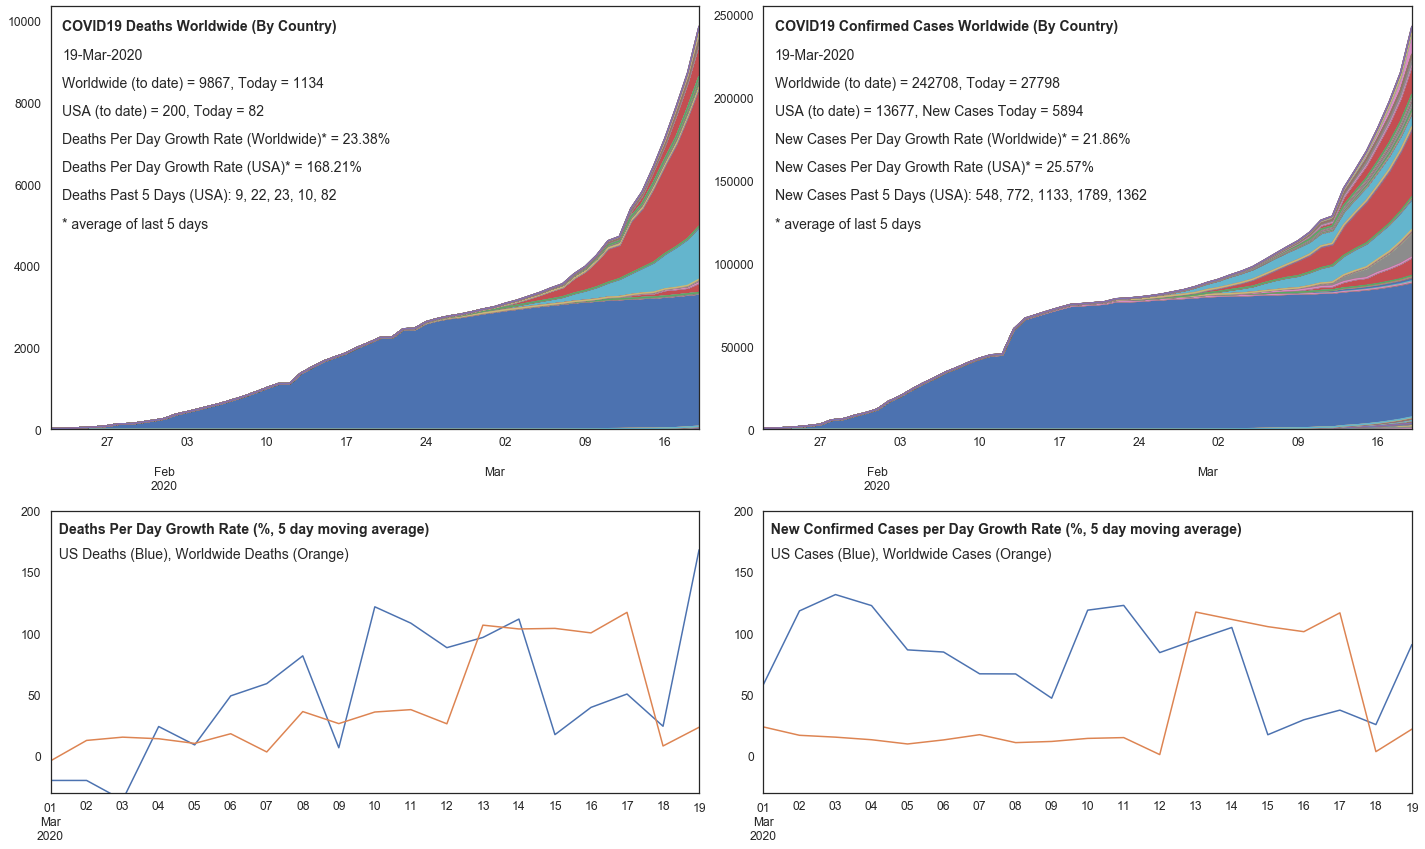

In [128]:
#Plot data

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1.5, 1]})

#latest date in data set
Date = D2.index[-1] 

#Set up the data - deaths
#total number of deaths worldwide, up to the latest date in the data set
WWDeathsToDate = D2.iloc[-1,:].sum() 
#WW deaths per day
WWDeathsPerDay = D2.sum(axis=1)[1:] - D2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWDeathsPerDayGrowthRateMA = WWDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest worldwide death growth rate based on moving average
LatestWWDeathsGrowthRate = WWDeathsPerDayGrowthRateMA[-1]
#total US deaths to latest date
USDeathsToDate = D2['US'][-1] 
#US deaths per day
USDeathsPerDay = D2['US'][1:] - D2['US'][:-1].values
#latest US death per day growth rate with moving average
USNewDeathsPerDayGrowthMA = USDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US death daily growth rate based on moving average
LatestUSDeathsPerDayGrowthRate = USNewDeathsPerDayGrowthMA[-1]
#deaths last 5 days
L5D = USDeathsPerDay[-5:]

#Set up the data - confirmed cases
#total number of confirmed cases worldwide, up to the latest date in the data set
WWCasesToDate = C2.iloc[-1,:].sum() 
#WW new cases per day
WWNewCasesPerDay = C2.sum(axis=1)[1:] - C2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWNewCasesPerDayGrowthRateMA = WWNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest worldwide confirmed cases growth rate based on moving average
LatestWWCasesGrowthRate = WWNewCasesPerDayGrowthRateMA[-1]
#total US confirmed cases to latest date
USCasesToDate = C2['US'][-1] 
#US confirmed new cases per day
USNewCasesPerDay = C2['US'][1:] - C2['US'][:-1].values #new cases per day
#latest US new confirmed cases per day growth rate over moving average
USNewCasesPerDayGrowthMA = USNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US confirmed cases daily growth rate based on moving average
plt.subplots_adjust(hspace=-1) 

#plot stacked area chart of deaths
D2.plot(kind='area', legend=False, ax=axarr1)
axarr1.text(D2.index[1], WWDeathsToDate, "COVID19 Deaths Worldwide (By Country)", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr1.text(D2.index[1], WWDeathsToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.86, "Worldwide (to date) = " + str(WWDeathsToDate) + ", Today = " + str(WWDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.79, "USA (to date) = " + str(USDeathsToDate) + ", Today = " + str(USDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.72, "Deaths Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(LatestWWDeathsGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.65, "Deaths Per Day Growth Rate (USA)* = " + "{:.2f}".format(LatestUSDeathsPerDayGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.58, "Deaths Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5D[-5],L5D[-4],L5D[-3],L5D[-2],L5D[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)
#axarr1.xaxis.labelpad = -20
# plt.xlabel("x",labelpad=-30)

#plot stacked area chart of confirmed cases
C2.plot(kind='area', legend=False, ax=axarr2)
axarr2.text(C2.index[1], WWCasesToDate, "COVID19 Confirmed Cases Worldwide (By Country)", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr2.text(C2.index[1], WWCasesToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[1], WWCasesToDate*.86, "Worldwide (to date) = " + str(WWCasesToDate) + ", Today = " + str(WWNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[1], WWCasesToDate*.79, "USA (to date) = " + str(USCasesToDate) + ", New Cases Today = " + str(USNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[1], WWCasesToDate*.72, "New Cases Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(LatestWWCasesGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[1], WWCasesToDate*.65, "New Cases Per Day Growth Rate (USA)* = " + "{:.2f}".format(LatestUSCasesGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[1], WWCasesToDate*.58, "New Cases Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5C[-5],L5C[-4],L5C[-3],L5C[-2],L5C[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[1], WWCasesToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot death growth rate over time (based on moving agerage)
USNewDeathsPerDayGrowthMA[38:].plot.line(ax=axarr3)
WWDeathsPerDayGrowthRateMA[38:].plot.line(ax=axarr3)
axarr3.text(USNewDeathsPerDayGrowthMA.index[38], 185, '  Deaths Per Day Growth Rate (%, ' + str(MovingAveDays) + ' day moving average)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr3.text(USNewDeathsPerDayGrowthMA.index[38], 165, '  US Deaths (Blue), Worldwide Deaths (Orange)', ha="left", va="center", rotation=0, fontsize=14)
axarr3.set_ylim([-30,200])

#plot confirmed cases growth rate over time (based on moving agerage)
USNewCasesPerDayGrowthMA[38:].plot.line(ax=axarr4)
WWNewCasesPerDayGrowthRateMA[38:].plot.line(ax=axarr4)
axarr4.text(USNewCasesPerDayGrowthMA.index[38], 185, '  New Confirmed Cases per Day Growth Rate (%, ' + str(MovingAveDays) + ' day moving average)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr4.text(USNewCasesPerDayGrowthMA.index[38], 165, '  US Cases (Blue), Worldwide Cases (Orange)', ha="left", va="center", rotation=0, fontsize=14)
axarr4.set_ylim([-30,200])

plt.tight_layout()

In [37]:
#make some projections on total US deaths in future
Rate = 1.2 #For 20% daily growth rate, use 1.2
Days = 42 #how far in future to project?

#calculate the projected number of total US deaths in Days
total=USDeathsPerDay[-1]
for i in range(Days-1):
    total = total + (USDeathsPerDay[-1] * Rate**(i+1))

print('USA COVID19 deaths to date is {}'.format(USDeathsToDate))  
print('Yesterday there were {:.0f} deaths'.format(USDeathsPerDay[-1]))  
print('Total US deaths in {} days, given a constant {:.0f}% daily growth rate, is {:.0f}'.format(Days,((Rate-1)*100),total))


USA COVID19 deaths to date is 118
Yesterday there were 10 deaths
Total US deaths in 42 days, given a constant 20% daily growth rate, is 105774


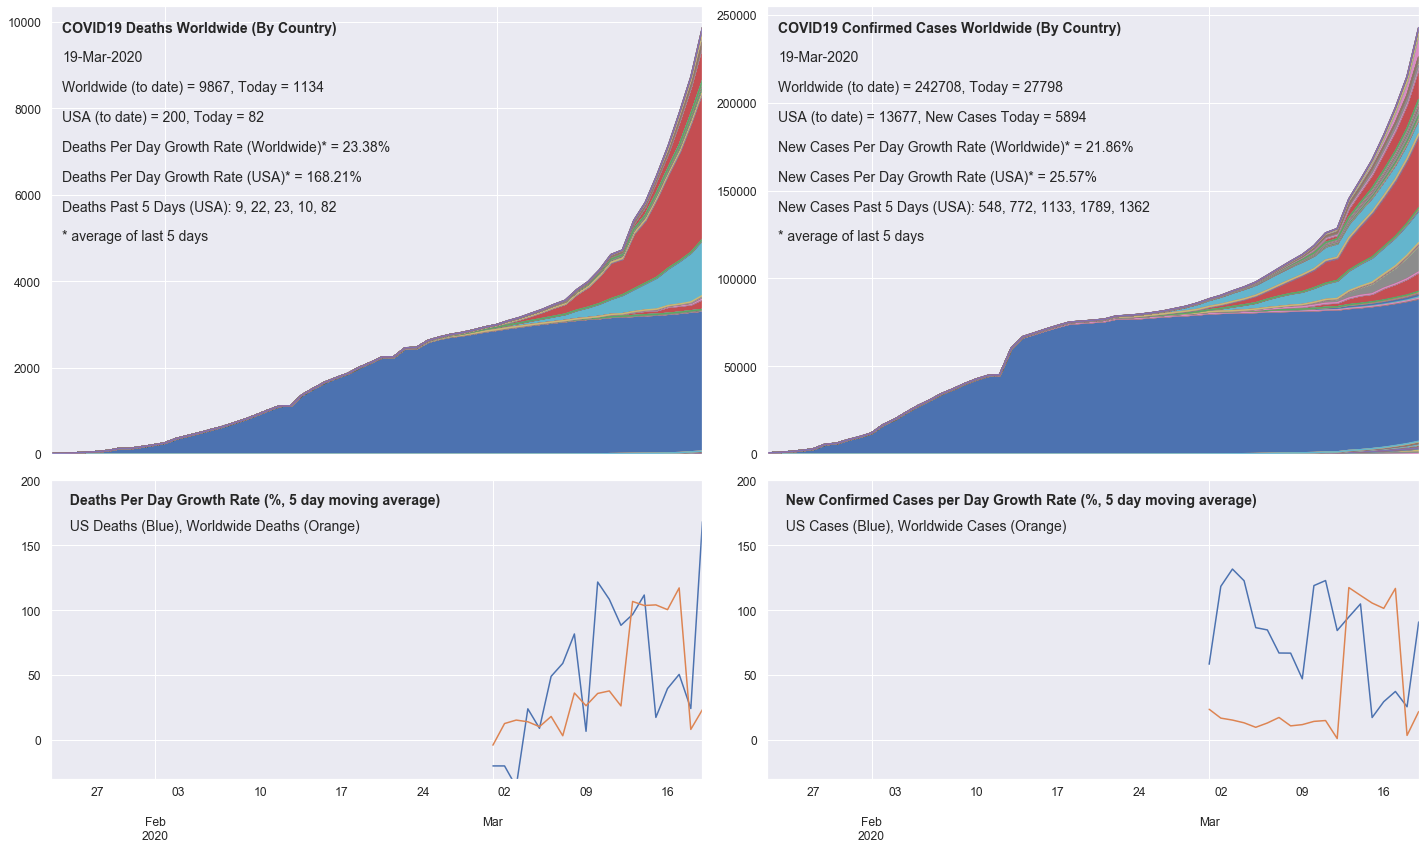

In [132]:
#Prettier plot with aligned x-axes between top and bottom charts, but shield pre-march growth rates since they are noisy

sns.set_style("darkgrid")
sns.set_context("notebook", font_scale = 1.1)

#Set up plot
fig, ((axarr1, axarr2), (axarr3, axarr4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 12),
                       gridspec_kw={
                           'width_ratios': [1, 1],
                           'height_ratios': [1.5, 1]})

#latest date in data set
Date = D2.index[-1] 

#Set up the data - deaths
#total number of deaths worldwide, up to the latest date in the data set
WWDeathsToDate = D2.iloc[-1,:].sum() 
#WW deaths per day
WWDeathsPerDay = D2.sum(axis=1)[1:] - D2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWDeathsPerDayGrowthRateMA = WWDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest worldwide death growth rate based on moving average
LatestWWDeathsGrowthRate = WWDeathsPerDayGrowthRateMA[-1]
#total US deaths to latest date
USDeathsToDate = D2['US'][-1] 
#US deaths per day
USDeathsPerDay = D2['US'][1:] - D2['US'][:-1].values
#latest US death per day growth rate with moving average
USNewDeathsPerDayGrowthMA = USDeathsPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US death daily growth rate based on moving average
LatestUSDeathsPerDayGrowthRate = USNewDeathsPerDayGrowthMA[-1]
#deaths last 5 days
L5D = USDeathsPerDay[-5:]

#Set up the data - confirmed cases
#total number of confirmed cases worldwide, up to the latest date in the data set
WWCasesToDate = C2.iloc[-1,:].sum() 
#WW new cases per day
WWNewCasesPerDay = C2.sum(axis=1)[1:] - C2.sum(axis=1)[:-1].values
#Worldwide death growth curve
WWNewCasesPerDayGrowthRateMA = WWNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest worldwide confirmed cases growth rate based on moving average
LatestWWCasesGrowthRate = WWNewCasesPerDayGrowthRateMA[-1]
#total US confirmed cases to latest date
USCasesToDate = C2['US'][-1] 
#US confirmed new cases per day
USNewCasesPerDay = C2['US'][1:] - C2['US'][:-1].values #new cases per day
#latest US new confirmed cases per day growth rate over moving average
USNewCasesPerDayGrowthMA = USNewCasesPerDay.pct_change().replace([np.inf, -np.inf], np.nan).fillna(0).rolling(window=MovingAveDays).mean()*100
#latest US confirmed cases daily growth rate based on moving average
plt.subplots_adjust(hspace=-1) 

#plot stacked area chart of deaths
D2.plot(kind='area', legend=False, ax=axarr1)
axarr1.text(D2.index[1], WWDeathsToDate, "COVID19 Deaths Worldwide (By Country)", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr1.text(D2.index[1], WWDeathsToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.86, "Worldwide (to date) = " + str(WWDeathsToDate) + ", Today = " + str(WWDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.79, "USA (to date) = " + str(USDeathsToDate) + ", Today = " + str(USDeathsPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.72, "Deaths Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(LatestWWDeathsGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.65, "Deaths Per Day Growth Rate (USA)* = " + "{:.2f}".format(LatestUSDeathsPerDayGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.58, "Deaths Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5D[-5],L5D[-4],L5D[-3],L5D[-2],L5D[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr1.text(D2.index[1], WWDeathsToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot stacked area chart of confirmed cases
C2.plot(kind='area', legend=False, ax=axarr2)
axarr2.text(C2.index[2], WWCasesToDate, "COVID19 Confirmed Cases Worldwide (By Country)", ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr2.text(C2.index[2], WWCasesToDate*.93, str(Date.strftime("%d-%b-%Y")), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.86, "Worldwide (to date) = " + str(WWCasesToDate) + ", Today = " + str(WWNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.79, "USA (to date) = " + str(USCasesToDate) + ", New Cases Today = " + str(USNewCasesPerDay[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.72, "New Cases Per Day Growth Rate (Worldwide)* = " + "{:.2f}".format(LatestWWCasesGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.65, "New Cases Per Day Growth Rate (USA)* = " + "{:.2f}".format(LatestUSCasesGrowthRate) + '%', ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.58, "New Cases Past 5 Days (USA): {}, {}, {}, {}, {}".format(L5C[-5],L5C[-4],L5C[-3],L5C[-2],L5C[-1]), ha="left", va="center", rotation=0, fontsize=14)
axarr2.text(C2.index[2], WWCasesToDate*.51, '* average of last ' + str(MovingAveDays) + ' days', ha="left", va="center", rotation=0, fontsize=14)

#plot death growth rate over time (based on moving agerage)
USNewDeathsPerDayGrowthMAcleaner = USNewDeathsPerDayGrowthMA #don't show growth data before March 1 since messy
USNewDeathsPerDayGrowthMAcleaner[0:38]=None
USNewDeathsPerDayGrowthMAcleaner.plot.line(ax=axarr3)
WWDeathsPerDayGrowthRateMA[38:].plot.line(ax=axarr3)
axarr3.text(USNewDeathsPerDayGrowthMA.index[1], 185, '  Deaths Per Day Growth Rate (%, ' + str(MovingAveDays) + ' day moving average)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr3.text(USNewDeathsPerDayGrowthMA.index[1], 165, '  US Deaths (Blue), Worldwide Deaths (Orange)', ha="left", va="center", rotation=0, fontsize=14)
axarr3.set_ylim([-30,200])
axarr1.get_shared_x_axes().join(axarr1, axarr3)
axarr2.get_shared_x_axes().join(axarr2, axarr4)
# axarr3.set_yscale('log')

#plot confirmed cases growth rate over time (based on moving agerage)
USNewCasesPerDayGrowthMAcleaner = USNewCasesPerDayGrowthMA #don't show growth data before March 1 since messy
USNewCasesPerDayGrowthMAcleaner[0:38]=None
USNewCasesPerDayGrowthMA.plot.line(ax=axarr4)
WWNewCasesPerDayGrowthRateMA[38:].plot.line(ax=axarr4)
axarr4.text(USNewCasesPerDayGrowthMA.index[1], 185, '  New Confirmed Cases per Day Growth Rate (%, ' + str(MovingAveDays) + ' day moving average)', ha="left", va="center", rotation=0, fontsize=14, fontweight='bold')
axarr4.text(USNewCasesPerDayGrowthMA.index[1], 165, '  US Cases (Blue), Worldwide Cases (Orange)', ha="left", va="center", rotation=0, fontsize=14)
axarr4.set_ylim([-30,200])

plt.tight_layout()

fig.savefig('20200319-covid19-chart.png')